In [11]:
# Merger rate for IMRIPY system when they throw away all of the dark matter before merging.



import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff
   


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3


m_1 = 7   #in units of M☉
m_2 = 9  #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(15)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    

m_2 = 0.1

print(m_1_list)

a_i = 1e8

[7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87, 112, 143, 184, 237]


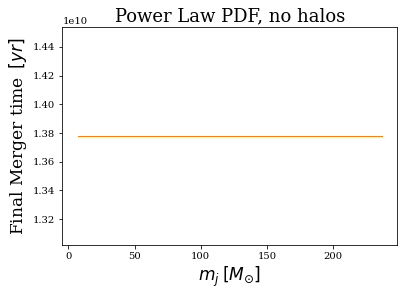

In [12]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'


def final_merger_time_nohalos(m_1):  # assuming a_i = a_f and hence j_i = j_f .
    a_f = a_i
    t_initial_merger_time = t_m
    return np.sqrt(a_f/a_i) * t_initial_merger_time



final_merger_time_nohalos_list = np.zeros(len(m_1_list))

for i, m_1 in enumerate(m_1_list):
    final_merger_time_nohalos_list[i] = final_merger_time_nohalos(m_1)

plt.plot(m_1_list, final_merger_time_nohalos_list, 'C1')



plt.xlabel('$m_{j}\:[M_{\odot}]$', fontsize = 17)
plt.ylabel('Final Merger time $\: [yr]$', fontsize = 17)
plt.title('Power Law PDF, no halos', fontsize = 18)
plt.show()     

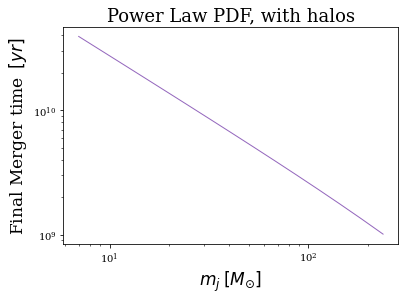

In [13]:

def final_merger_time_withhalos(m_1):  # j_f = sqrt(a_i/a_f) * j_i
    
    t_initial_merger_time = t_m  # as per j_i corresponding to t_m.
    
    def x(m_1, m_2):  # Let a_i = (0.0977 * λ *x)
        return  (((3 * (m_1 + m_2 ) * a_i)/(8 * π * ρ_eq))**(1/4)) * ((0.0977)**(-1/4))
    
    def λ(m_1, m_2):
        return (a_i / (0.0977 * x(m_1, m_2)))
    
    
    def s(m_1, m_2): # S_dec of the binary decouple.
        return ((0.03095*λ(m_1, m_2)+ 0.3425)*λ(m_1, m_2))
    
    
    def t_dec(m_1, m_2):    # t_dec of the binary decouple.
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2)-2)*np.sqrt(s(m_1, m_2)+1))+(4/3)))
  
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    
    
    def M_1halo(m_1, m_2):
        return (((16*π)/3)*ρ_bar(m_1)*((2*G*m_1*(t_dec(m_1, m_2)**2))**(1/4)))
    
    
    def M_2halo(m_1, m_2):
        return (((16*π)/3)*ρ_bar(m_2)*((2*G*m_2*(t_dec(m_1, m_2)**2))**(1/4)))
    

    def M_binary_initial(m_1, m_2):
        return (m_1 + m_2 + M_1halo(m_1, m_2) + M_2halo(m_1, m_2))
      
    def M_1(m_1, m_2):
        return (m_1 + M_1halo(m_1, m_2))
    
    def M_2(m_1, m_2):
        return (m_2 + M_2halo(m_1, m_2))
    
    def M_binary_final(m_1, m_2):
        return (m_1 + m_2 )
      
    
    #Schwarzchild Radius of the PBH.
    def r_s(m): 
        return ((2*G*m)/(c**2)) 


    #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
    def r_ta(m): 
        return ((2*G*m*(t_dec(m_1, m_2)**2))**(1/3))


    # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
    def E_b(m): 
        return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))
    
    
    def a_final(m_1,m_2):
        return ((G* m_1 * m_2 * a_i)/((G * M_1(m_1, m_2) * M_2(m_1, m_2))-(2 * a_i *(E_b(m_1)+E_b(m_2)))))


    
    return  ((M_1(m_1, m_2) + M_2(m_1, m_2) + M_binary_initial(m_1, m_2))/(m_1 * m_2  * M_binary_final(m_1, m_2))) * np.sqrt(a_final(m_1,m_2)/a_i) * t_initial_merger_time



plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'


final_merger_time_withhalos_list = np.zeros(len(m_1_list))

for i, m_1 in enumerate(m_1_list):
    final_merger_time_withhalos_list[i] = final_merger_time_withhalos(m_1)

plt.loglog(m_1_list, final_merger_time_withhalos_list, 'C4')



plt.xlabel('$m_{j}\:[M_{\odot}]$', fontsize = 17)
plt.ylabel('Final Merger time $\: [yr]$', fontsize = 17)
plt.title('Power Law PDF, with halos', fontsize = 18)
plt.show()     

In [ ]:
# Setting initial and final conditions of the binary evolution for an eccentric orbi




plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)






tm_list = np.zeros(len(m_1_list))



for i, m_1 in enumerate(m_1_list):
   
    m1 =  m_1 * ms.solar_mass_to_pc  
    m2 = 0.1 * ms.solar_mass_to_pc 
    
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_1)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    
    
    
    
    
    def x(m_1, m_2):  # Let a_i = (0.0977 * λ *x)
        return  (((3 * (m_1 + m_2 ) * a_i)/(8 * π * ρ_eq))**(1/4)) * ((0.0977)**(-1/4))
    
    def λ(m_1, m_2):
        return (a_i / (0.0977 * x(m_1, m_2)))
    
    
    def s(m_1, m_2): # S_dec of the binary decouple.
        return ((0.03095*λ(m_1, m_2)+ 0.3425)*λ(m_1, m_2))
    
    
    def t_dec(m_1, m_2):    # t_dec of the binary decouple.
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2)-2)*np.sqrt(s(m_1, m_2)+1))+(4/3)))
  
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    
    
    def M_1halo(m_1, m_2):
        return (((16*π)/3)*ρ_bar(m_1)*((2*G*m_1*(t_dec(m_1, m_2)**2))**(1/4)))
    
    
    def M_2halo(m_1, m_2):
        return (((16*π)/3)*ρ_bar(m_2)*((2*G*m_2*(t_dec(m_1, m_2)**2))**(1/4)))
    

    def M_binary_initial(m_1, m_2):
        return (m_1 + m_2 + M_1halo(m_1, m_2) + M_2halo(m_1, m_2))
      
    def M_1(m_1, m_2):
        return (m_1 + M_1halo(m_1, m_2))
    
    def M_2(m_1, m_2):
        return (m_2 + M_2halo(m_1, m_2))
  
    
    
    def j_initial(m_1, m_2):
        return  (((85/3) * (G**3) * M_1(m_1, m_2) * M_2(m_1, m_2)* M_binary_initial(m_1, m_2) * t_m)/((a_i**4)*(c**5)))**(1/7)
    
    
    j_i = j_initial(m_1, m_2)
    e0 = np.sqrt(1 - (j_i**2))
    
    
    
   
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    

    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i, e0,  a_fin = R_fin)
    
    
    tm_list[i] = ev_ecc.t[-1]/ms.year_to_pc
    
    
plt.loglog(m_1_list, tm_list, '--o')
    


    

plt.xlabel('$m_{1}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)

plt.grid()
plt.show()

Evolving from  4.960317460317461e+19  to  1.0 r_isco  with initial eccentricity 0.9999999983372553  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:199: RuntimeWarning: divide by zero encountered in double_scalars
  return 4.*np.pi * sp.m2**2 * sp.halo.density(r) * Classic.dmPhaseSpaceFraction * ln_Lambda / v**2
/home/pratibhajangra/imripy/src/imripy/inspiral.py:336: RuntimeWarning: invalid value encountered in double_scalars
  return F(sp, r, v_s, opt)*v_s / (1.+e*np.cos(phi))**2
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  qu